<a href="https://colab.research.google.com/github/Maffyo/Maffyo/blob/main/Create_visualizations_using_Matplotib%2C_Seaborn_and_Folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

In [ ]:
import aiohttp

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    f.write(await response.read())

In [ ]:
await download(file_path, "historical_automobile_sales.csv")
file_name="historical_automobile_sales.csv"

In [ ]:
df = pd.read_csv(file_name)

In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

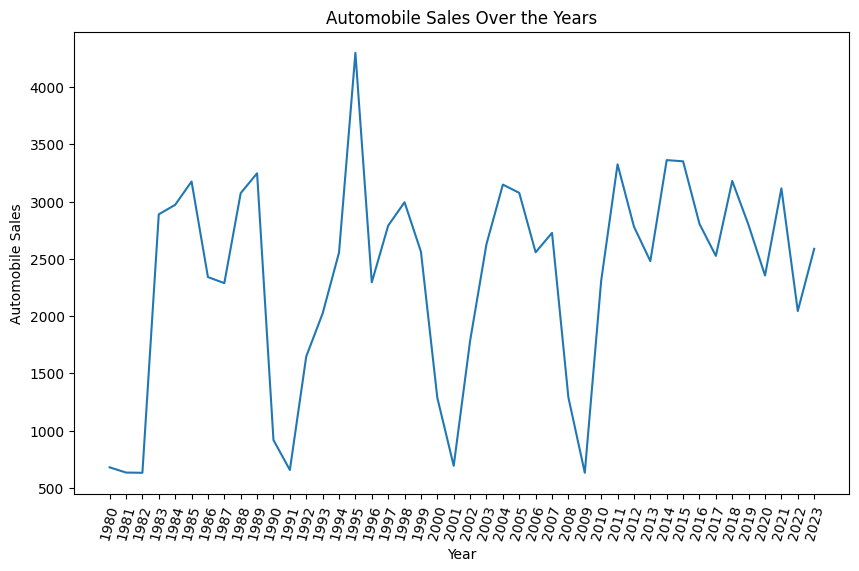

In [ ]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))

df_line.plot(kind = 'line')

plt.xticks(list(range(1980,2024)), rotation = 75)

plt.xlabel('Year')

plt.ylabel('Automobile Sales')

plt.title('Automobile Sales Over the Years')

plt.show()

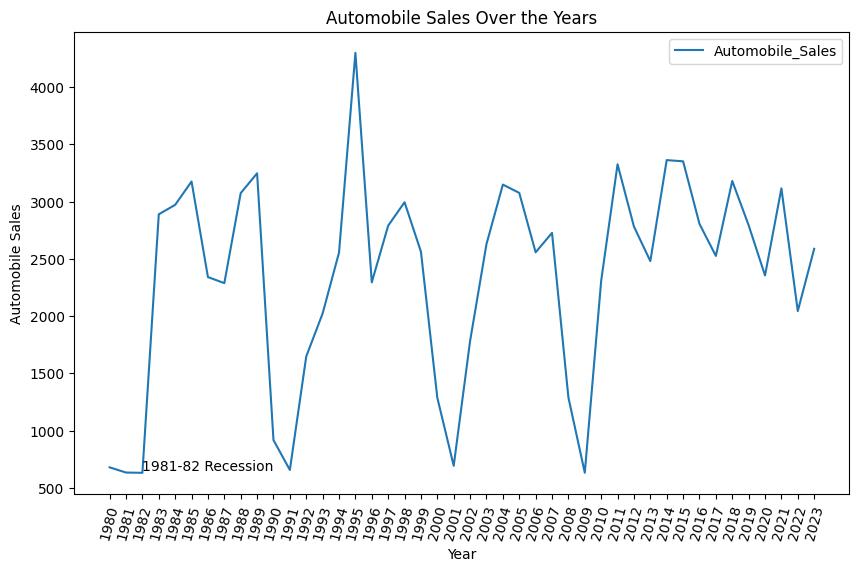

In [ ]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

plt.figure(figsize=(10, 6))

df_line.plot(kind = 'line')

plt.xticks(list(range(1980,2024)), rotation = 75)

plt.xlabel('Year')

plt.ylabel('Automobile Sales')

plt.title('Automobile Sales Over the Years')

plt.text(1982, 650, '1981-82 Recession')

plt.legend()

plt.show()

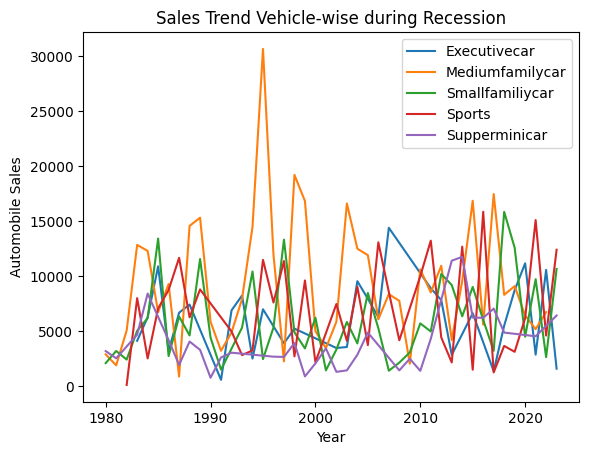

In [ ]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()

df_Mline.set_index('Year', inplace=True)

df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']

df_Mline.plot(kind='line')

plt.xlabel('Year')

plt.ylabel('Automobile Sales')

plt.title('Sales Trend Vehicle-wise during Recession')

plt.legend()

plt.show()

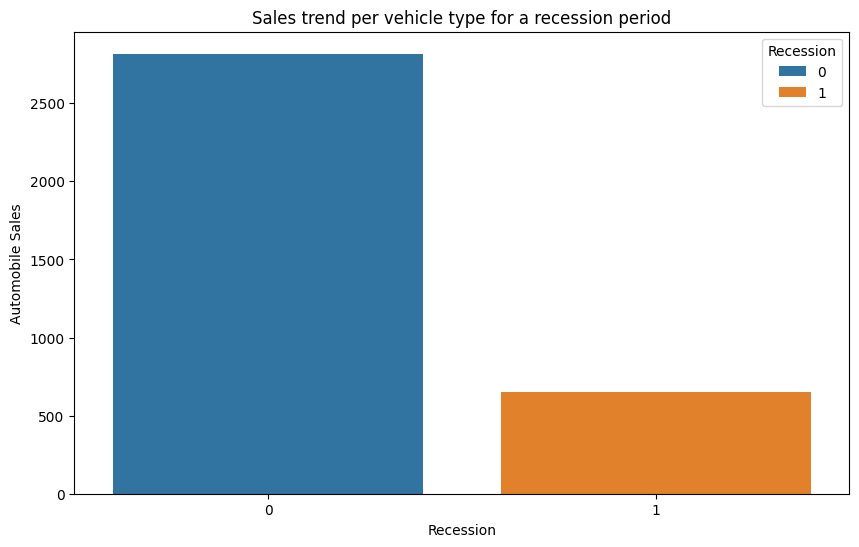

In [ ]:
sea = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=sea, x='Recession', y='Automobile_Sales', hue='Recession')

plt.xlabel('Recession')

plt.ylabel('Automobile Sales')

plt.title('Sales trend per vehicle type for a recession period')

plt.show()

In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


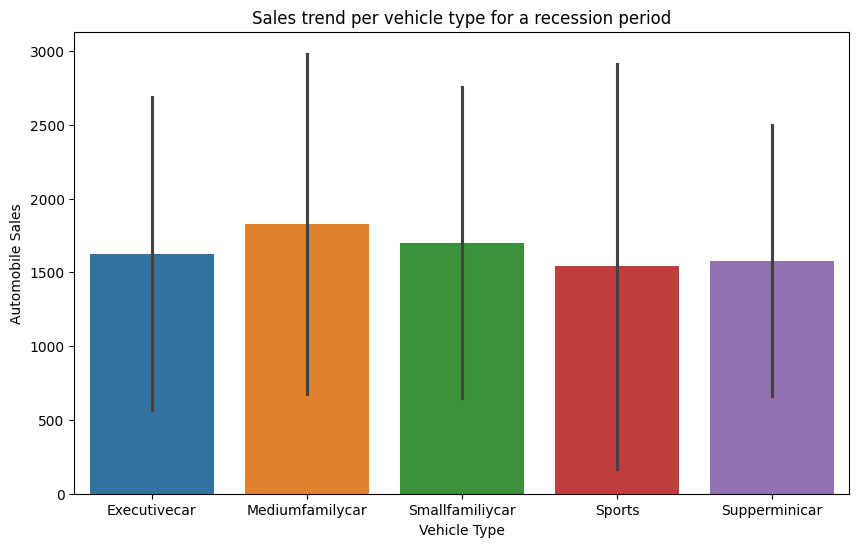

In [ ]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(data=dd, x='Vehicle_Type', y='Automobile_Sales', hue='Vehicle_Type')

plt.xlabel('Vehicle Type')

plt.ylabel('Automobile Sales')

plt.title('Sales trend per vehicle type for a recession period')

plt.show()

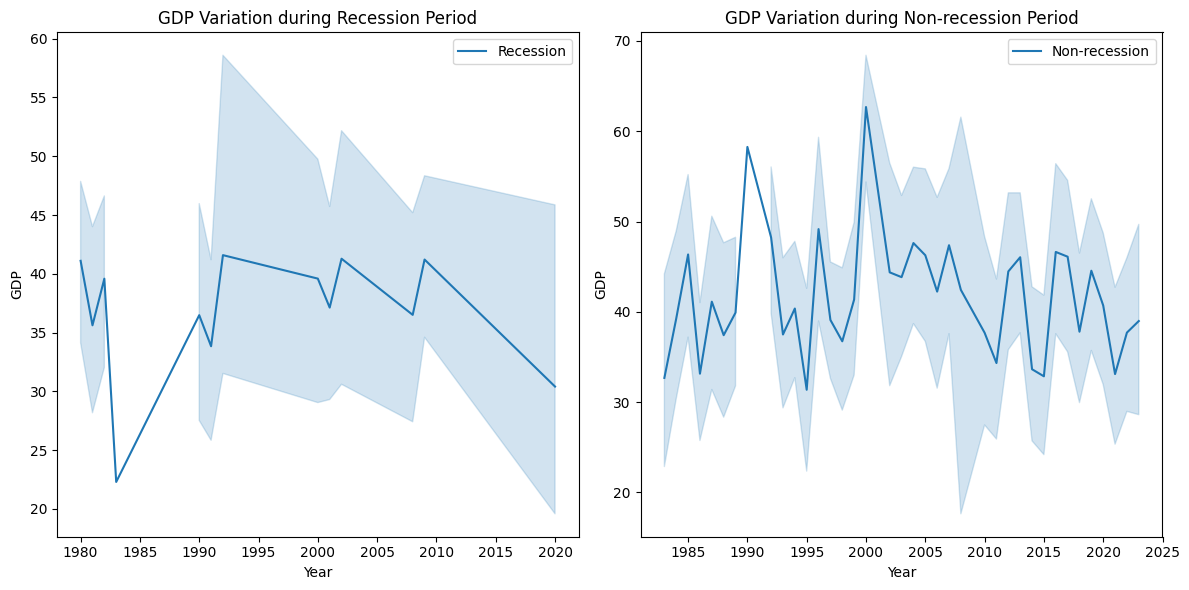

In [ ]:
rec_data = df[df['Recession'] == 1]

non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)

ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)

ax0.set_xlabel('Year')

ax0.set_ylabel('GDP')

ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-recession',ax=ax1)

ax1.set_xlabel('Year')

ax1.set_ylabel('GDP')

ax1.set_title('GDP Variation during Non-recession Period')

plt.tight_layout()

plt.show()

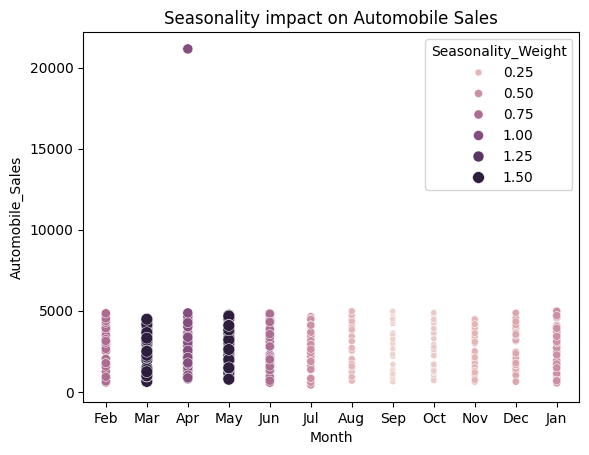

In [ ]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight']

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')

plt.xlabel('Month')

plt.ylabel('Automobile_Sales')

plt.title('Seasonality impact on Automobile Sales')

plt.show()

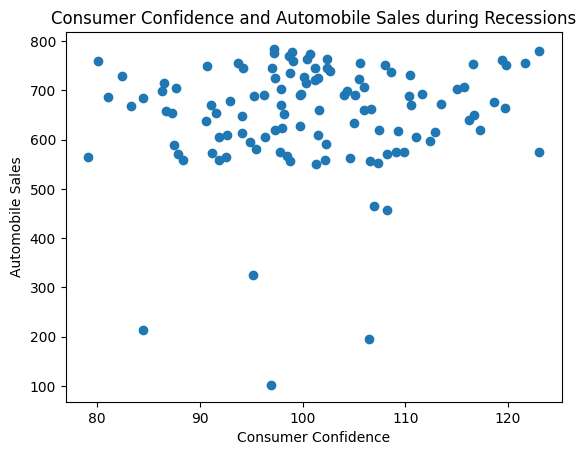

In [ ]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')

plt.ylabel('Automobile Sales')

plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

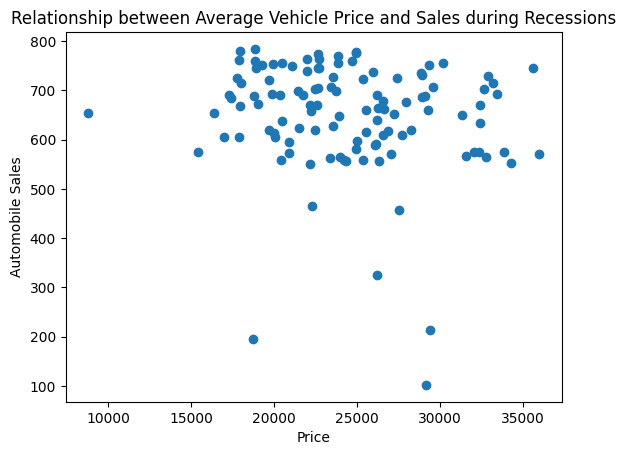

In [ ]:
rec_data = df[df['Recession'] == 1]

plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')

plt.ylabel('Automobile Sales')

plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

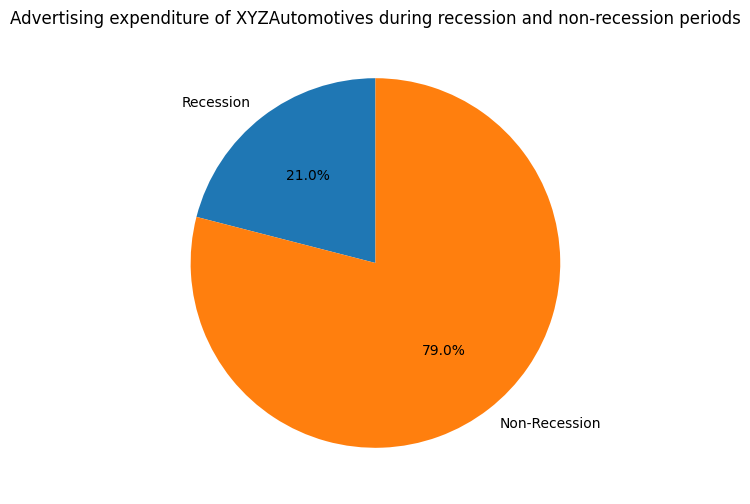

In [ ]:
RT = rec_data['Advertising_Expenditure'].sum()

NRT = non_rec_data['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']

sizes = [RT, NRT]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising expenditure of XYZAutomotives during recession and non-recession periods')

plt.show()

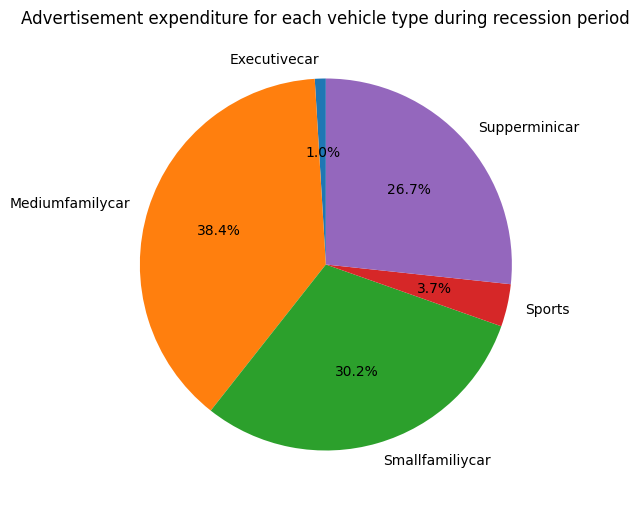

In [ ]:
VTexpenditure = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(6, 8))

labels = VTexpenditure.index

sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement expenditure for each vehicle type during recession period')

plt.show()

In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [ ]:
sales_by_city = rec_data.groupby('City')['Automobile_Sales'].sum().reset_index()

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data= 'us-states.json',
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
    ).add_to(map1)
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1